In [1]:
import numpy as np
import dolfin as dl
import matplotlib.pyplot as plt

In [2]:
nx = 30
ny = nx
mesh = dl.UnitSquareMesh(nx, ny)
Vh = dl.FunctionSpace(mesh, 'CG', 1)

correlation_length = 0.3
gamma = 1.0
delta = 4.0 * gamma / (correlation_length**2)

stiffness_form = dl.inner(dl.grad(dl.TrialFunction(Vh)), dl.grad(dl.TestFunction(Vh))) * dl.dx
mass_form      = dl.TrialFunction(Vh) * dl.TestFunction(Vh) * dl.dx
robin_form     = dl.TrialFunction(Vh) * dl.TestFunction(Vh) * dl.ds

K_neumann = dl.assemble(stiffness_form)
M = dl.assemble(mass_form)
RB = dl.assemble(robin_form)

K_robin = K_neumann + RB * 2.0 / (1.42 * correlation_length)

mass_lumps = dl.assemble(dl.TestFunction(Vh) * dl.dx)

A_neumann = gamma * K_neumann + delta * M
A_robin = gamma * K_robin + delta * M

Text(0.5, 1.0, 'u2 = A_neumann \\ M @ A_neumann \\ noise')

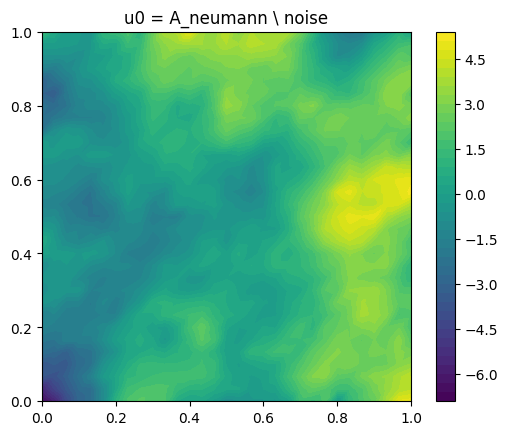

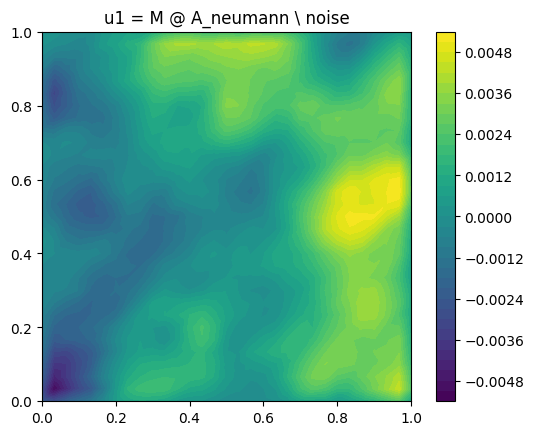

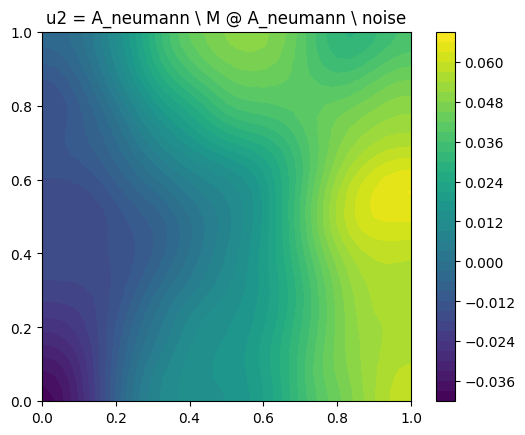

In [3]:
noise = dl.Function(Vh)
noise.vector()[:] = np.random.randn(Vh.dim())

# u0 = A_neumann \ noise
u0 = dl.Function(Vh)
dl.solve(A_neumann, u0.vector(), noise.vector())

plt.figure()
cm = dl.plot(u0)
plt.colorbar(cm)
plt.title('u0 = A_neumann \ noise')

# u1 = M @ A_neumann \ noise
u1 = dl.Function(Vh)
u1.vector()[:] = M * u0.vector()

plt.figure()
cm = dl.plot(u1)
plt.colorbar(cm)
plt.title('u1 = M @ A_neumann \ noise')

# u2 = M @ A_neumann \ noise
u2 = dl.Function(Vh)
dl.solve(A_neumann, u2.vector(), u1.vector())

plt.figure()
cm = dl.plot(u2)
plt.colorbar(cm)
plt.title('u2 = A_neumann \ M @ A_neumann \ noise')

Text(0.5, 1.0, 'u2 = A_neumann \\ diag(mass_lumps) @ A_neumann \\ noise')

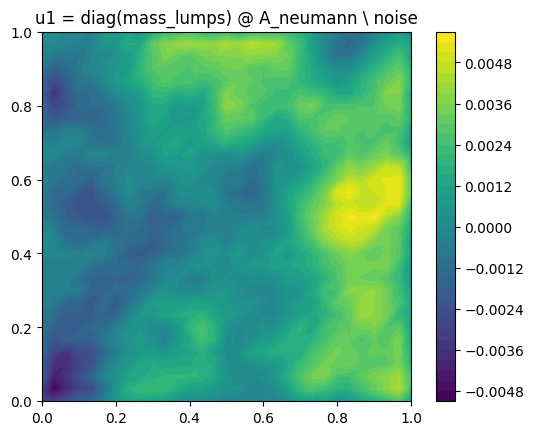

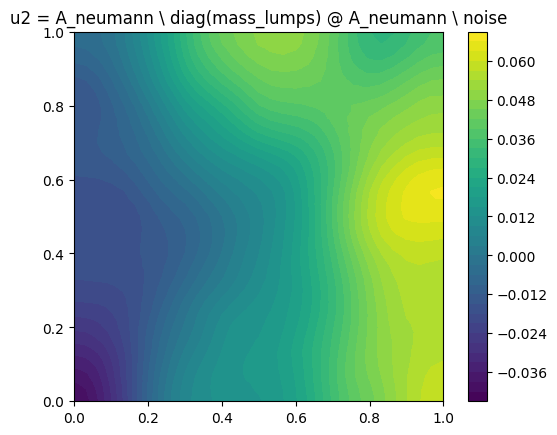

In [4]:
u0 = dl.Function(Vh)
dl.solve(A_neumann, u0.vector(), noise.vector())

# u1 = diag(mass_lumps) @ A_neumann \ noise
u1 = dl.Function(Vh)
u1.vector()[:] = mass_lumps * u0.vector()

plt.figure()
cm = dl.plot(u1)
plt.colorbar(cm)
plt.title('u1 = diag(mass_lumps) @ A_neumann \ noise')

# u2 = M @ A_neumann \ noise
u2 = dl.Function(Vh)
dl.solve(A_neumann, u2.vector(), u1.vector())

plt.figure()
cm = dl.plot(u2)
plt.colorbar(cm)
plt.title('u2 = A_neumann \ diag(mass_lumps) @ A_neumann \ noise')

Text(0.5, 1.0, 'u2 = A_robin \\ M @ A_robin \\ noise')

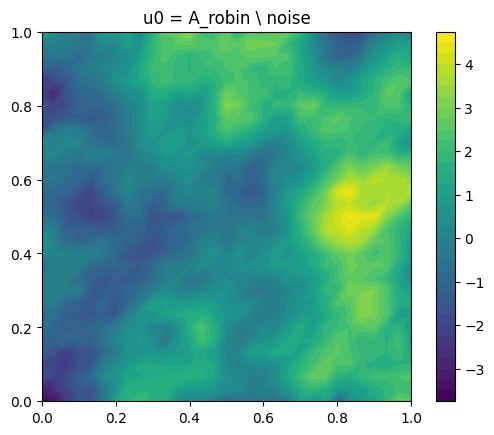

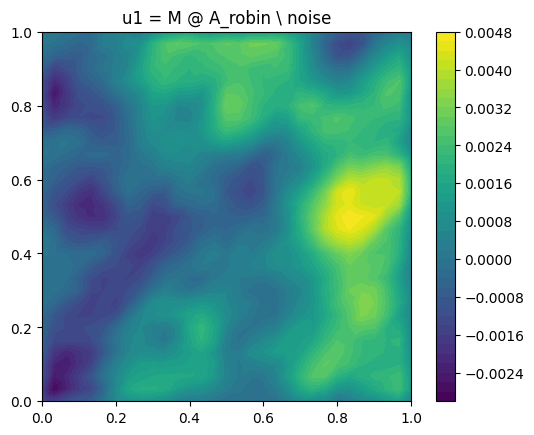

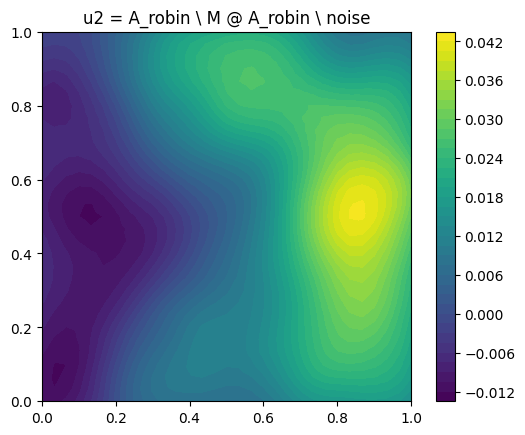

In [5]:
# u0 = A_robin \ noise
u0 = dl.Function(Vh)
dl.solve(A_robin, u0.vector(), noise.vector())

plt.figure()
cm = dl.plot(u0)
plt.colorbar(cm)
plt.title('u0 = A_robin \ noise')

# u1 = M @ A_robin \ noise
u1 = dl.Function(Vh)
u1.vector()[:] = M * u0.vector()

plt.figure()
cm = dl.plot(u1)
plt.colorbar(cm)
plt.title('u1 = M @ A_robin \ noise')

# u2 = M @ A_robin \ noise
u2 = dl.Function(Vh)
dl.solve(A_robin, u2.vector(), u1.vector())

plt.figure()
cm = dl.plot(u2)
plt.colorbar(cm)
plt.title('u2 = A_robin \ M @ A_robin \ noise')

Text(0.5, 1.0, 'u2 = A_robin \\ diag(mass_lumps) @ A_robin \\ noise')

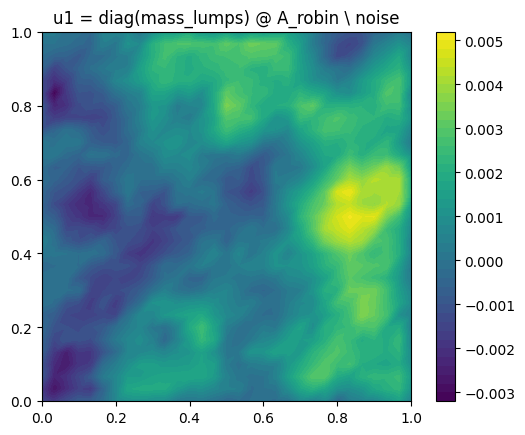

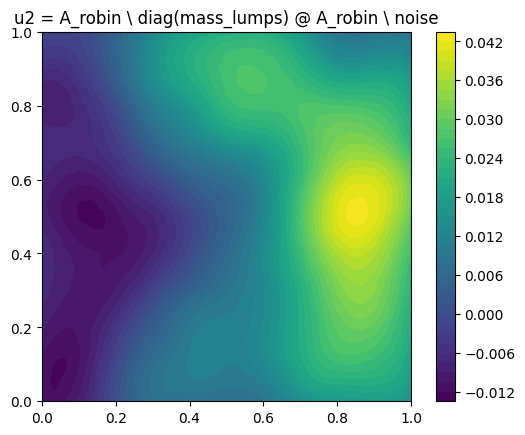

In [6]:
u0 = dl.Function(Vh)
dl.solve(A_robin, u0.vector(), noise.vector())

# u1 = M @ A_robin \ noise
u1 = dl.Function(Vh)
u1.vector()[:] = mass_lumps * u0.vector()

plt.figure()
cm = dl.plot(u1)
plt.colorbar(cm)
plt.title('u1 = diag(mass_lumps) @ A_robin \ noise')

# u2 = diag(mass_lumps) @ A_robin \ noise
u2 = dl.Function(Vh)
dl.solve(A_robin, u2.vector(), u1.vector())

plt.figure()
cm = dl.plot(u2)
plt.colorbar(cm)
plt.title('u2 = A_robin \ diag(mass_lumps) @ A_robin \ noise')